<a href="https://colab.research.google.com/github/athulpn/ML-Projects/blob/master/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
dataset = pd.read_csv('logistic_new.csv') 
print(dataset)

      Passengerid   Age      Fare  Sex  sibsp  Pclass  2urvived
0               1  22.0    7.2500    0      1       3         0
1               2  38.0   71.2833    1      1       1         1
2               3  26.0    7.9250    1      0       3         1
3               4  35.0   53.1000    1      1       1         1
4               5  35.0    8.0500    0      0       3         0
...           ...   ...       ...  ...    ...     ...       ...
1304         1305  28.0    8.0500    0      0       3         0
1305         1306  39.0  108.9000    1      0       1         0
1306         1307  38.5    7.2500    0      0       3         0
1307         1308  28.0    8.0500    0      0       3         0
1308         1309  28.0   22.3583    0      1       3         0

[1309 rows x 7 columns]


In [38]:
 
x = dataset.iloc[:, [2,3]].values  
y = dataset.iloc[:, 6].values 
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

print (xtrain[0:10, :]) 


[[-0.36366635  1.45405836]
 [-0.14746173 -0.68773031]
 [-0.46473958  1.45405836]
 [-0.20708767  1.45405836]
 [ 0.73286918  1.45405836]
 [-0.49067444 -0.68773031]
 [-0.37045304  1.45405836]
 [-0.21678294  1.45405836]
 [-0.10092441 -0.68773031]
 [ 4.47185172  1.45405836]]


In [39]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 
y_pred = classifier.predict(xtest) 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 

print ("Confusion Matrix : \n", cm) 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 


Confusion Matrix : 
 [[211  16]
 [ 82  19]]
Accuracy :  0.7012195121951219


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


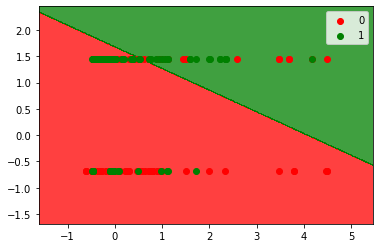

In [40]:
from matplotlib.colors import ListedColormap 
X_set, y_set = xtest, ytest 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
							stop = X_set[:, 0].max() + 1, step = 0.01), 
					np.arange(start = X_set[:, 1].min() - 1, 
							stop = X_set[:, 1].max() + 1, step = 0.01)) 

plt.contourf(X1, X2, classifier.predict( 
			np.array([X1.ravel(), X2.ravel()]).T).reshape( 
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(y_set)): 
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
				c = ListedColormap(('red', 'green'))(i), label = j) 
	
 
plt.legend() 
plt.show() 
